#### Exploration and Visualization Pipeline
##### Generic Functions created for use with any dataframe.

##### 13th May 2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import matplotlib
%matplotlib inline

# EXPLORING  DATA

In [2]:
def exploring_overview(df):
    '''
    This function gives a high level view of the dataset.
    It states the attributes which exists, and provides information 
        about the dataset.
    '''
    list_of_columns = df.columns
    print ('LIST OF COLUMNS: ')
    print (list_of_columns)
    print ()
    
    print ('NUMBER OF ROWS ARE: ', df.shape[0])
    print ( 'NUMBER OF COLUMNS ARE: ', df.shape[1])
    print ()
    
    print ('SOME BASIC INFORMATION ABOUT THE ATTRIBUTES: ')
    print (df.info())
    print ()
    
    print ('DESCRIPTION OF THE DATASET:')
    print (df.describe())
    
    

In [3]:
def grouping_by_feature (feature, df):
    '''
    For a given feature, it separates the data for the different values of that feature.
        example: for a variable 'SeriousDlqin2yrs', where two values exist i.e. 0 and 1,
            the function separates the other variables and gives a grouped description of 
            how other variable statistics vary with this feature's division
    '''
    print (df.groupby(feature).mean().transpose())

In [4]:
def comparing_across_two_features (feature1, feature2, df):
    '''
    For any two features, it compares the variation in the data across those two features
    '''
    first_entry = 'df.' + feature1
    second_entry = 'df.' + feature2
    
    try:
        pd.crosstab(first_entry, second_entry)
    except:
        print ()

In [5]:
def summing_nulls_in_dataset (df):
    '''
    Sums the null values in every attribute of the dataset, and states the null values in each 
    '''
    print (df.isnull().sum())

In [6]:
def counting_in_a_variable(feature, df):
    '''
    For a given feature and dataframe,
        prints the total count of each category of that feature.
    '''
    print (df[feature].value_counts())


In [7]:
def counting_uniques(df):
    '''
    For the given dataframe, gives a sum of the unique values in each feature.
    Then prints a plot bar to represent that.
    '''
    print (df.nunique())
    print (df.nunique().plot.bar())


# VISUALIZATIONS

In [8]:
def draw_correlation_matrix (df, title):
    '''
    Creates a heatmap that shows the correlations between the different variables in a dataframe.
    
    Input:
        df: a dataframe
        title: name of the correlation_matrix
        
    Return:
        Outputs a heatmatrix showing correlations
    
    Code based on: https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
    '''
    ax = plt.axes()
    corr = df.corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values, ax = ax) 
    ax.set_title (title)

In [9]:
def plotting_curve (df, feature, title):
    '''
    Given a dataframe, a column name, and a title,
        displays a plot of that dataframe column distribution.
        
    Input:
        dataframe
        column: column name (string)
        title: string
        
    Return:
        displays a distribution of that variable
        
    Inspired by:
        https://seaborn.pydata.org/generated/seaborn.distplot.html
    '''
    try:
        ax = sns.distplot(df[feature])
        ax.set_title(title)
        plt.show()
    except:
        pass

In [10]:
def making_pie (df, feature):
    '''
    Gives a pie plot of data in any feature
    '''
    if (df[feature].nunique()) < 10:    
        try: 
            df.groupby([feature]).size().plot(kind='pie')
            plt.show()
        except:
            pass
    else:
        print (' ')

In [11]:
def plotting_bar (df, feature):
    '''
    Plots a bar graph based on the size of each category of that feature
    '''
    try: 
        df.groupby([feature]).size().plot.bar()
        plt.show()
    except:
        pass

In [12]:
def plotting_top_10_bar_plot  (df, feature):
    '''
    Plots a bar plot for the top 10 common values of a given feature
    '''
    df.groupby([feature]).size().sort_values().iloc[-10:].plot.bar()

In [18]:
def main(df, title):
    
    #### Code to Run for Exploration:
    exploring_overview(df)
    list_of_columns = set(df.columns)

    for feature in list_of_columns:
        grouping_by_feature (feature, df)
        counting_in_a_variable(feature, df)

    summing_nulls_in_dataset (df)
    counting_uniques(df)
    
    
    ### Code for Visualizations:
    draw_correlation_matrix (df, title)

    for feature in list_of_columns:
        plotting_curve (df, feature, title)
        making_pie (df, feature)


LIST OF COLUMNS: 
Index(['hash_ssn', 'hash_ssn4', 'hash_lname', 'hash_fname', 'patid', 'dob',
       'race', 'sex', 'hash_gcstreetaddress', 'city', 'state', 'zip',
       'gcvalidity', 'gcsrctabl', 'gcscore', 'gccity', 'gccounty', 'gcstate',
       'gczipcode', 'hash_gclonglat', 'gctract2010id', 'gcblockgroup2010id',
       'gcblock2010id', 'admit_date', 'dschrg_date', 'program', 'pri_dx_code',
       'pri_dx_value', 'refferal_source', 'case_id', 'dedupe_id'],
      dtype='object')

NUMBER OF ROWS ARE:  26096
NUMBER OF COLUMNS ARE:  31

SOME BASIC INFORMATION ABOUT THE ATTRIBUTES: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26096 entries, 0 to 26095
Data columns (total 31 columns):
hash_ssn                20917 non-null object
hash_ssn4               20917 non-null object
hash_lname              26096 non-null object
hash_fname              26096 non-null object
patid                   26096 non-null int64
dob                     26089 non-null object
race                    224

hash_lname            0007253fdf9eef30a9296715b0509427152b82c4c3b6e5c7c86b24651c234d78  \
patid                                                      1.286040e+05                  
hash_gcstreetaddress                                                NaN                  
zip                                                        6.606900e+04                  
gcscore                                                    9.000000e+01                  
hash_gclonglat                                                      NaN                  
gctract2010id                                              2.009105e+10                  
gcblockgroup2010id                                         2.009105e+11                  
gcblock2010id                                              2.009105e+14                  
case_id                                                    5.748000e+03                  
dedupe_id                                                  2.633333e+01                  

hash_lnam

gccity                 ABILENE         ALMENA   ARGONIA    ARVADA   ASSARIA  \
patid                 134329.0  102916.000000  138031.0  125984.0  206381.0   
hash_gcstreetaddress       NaN            NaN       NaN       NaN       NaN   
zip                    67410.0   67622.000000   67004.0   80002.0   67416.0   
gcscore                  100.0     100.000000     100.0     100.0     100.0   
hash_gclonglat             NaN            NaN       NaN       NaN       NaN   
gctract2010id              NaN            NaN       NaN       NaN       NaN   
gcblockgroup2010id         NaN            NaN       NaN       NaN       NaN   
gcblock2010id              NaN            NaN       NaN       NaN       NaN   
case_id                21871.0   16076.333333   11301.0   11728.0   23918.0   
dedupe_id             142263.0  281276.000000  329033.0  589094.0  437915.0   

gccity                ATCHISON    AUBURN    AURORA     AVOCA   BALDWIN CITY  \
patid                  88639.0  137945.0   62778.0 

gczipcode                10028     24201     29550     33141     33436  \
patid                 120232.0  132059.0  100660.0  119142.0   73547.0   
hash_gcstreetaddress       NaN       NaN       NaN       NaN       NaN   
zip                    10028.0   24201.0   29550.0   33141.0   33436.0   
gcscore                  100.0     100.0     100.0     100.0     100.0   
hash_gclonglat             NaN       NaN       NaN       NaN       NaN   
gctract2010id              NaN       NaN       NaN       NaN       NaN   
gcblockgroup2010id         NaN       NaN       NaN       NaN       NaN   
gcblock2010id              NaN       NaN       NaN       NaN       NaN   
case_id                 8821.0   16644.0    8163.0    7092.0   13289.0   
dedupe_id             329286.0  527383.0  357370.0  560043.0  611336.0   

gczipcode                33868     37043     37874     38118     44223  \
patid                 110235.0  120858.0  143162.0  130639.0   74808.0   
hash_gcstreetaddress       NaN       

state                       AL         AR             AZ        CA        CO  \
patid                 134495.0   94204.60  123697.272727  121023.1  106618.8   
hash_gcstreetaddress       NaN        NaN            NaN       NaN       NaN   
zip                    35055.0   72069.25   85410.272727   92537.7   80521.4   
gcscore                    NaN        NaN     100.000000     100.0     100.0   
hash_gclonglat             NaN        NaN            NaN       NaN       NaN   
gctract2010id              NaN        NaN            NaN       NaN       NaN   
gcblockgroup2010id         NaN        NaN            NaN       NaN       NaN   
gcblock2010id              NaN        NaN            NaN       NaN       NaN   
case_id                 5426.0   10360.00   13340.727273   11598.7   13062.6   
dedupe_id             533783.0  382054.80  378826.545455  451520.8  374451.0   

state                       DC             FL        GA        IA        IL  \
patid                 116845.0   95287.4

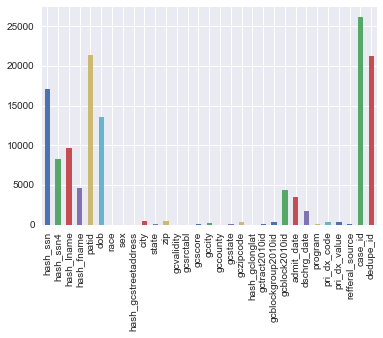

In [13]:

df = pd.read_csv('health.csv')
title = 'HEALTH'

#### Code to Run for Exploration:
exploring_overview(df)
list_of_columns = set(df.columns)

for feature in list_of_columns:
    grouping_by_feature (feature, df)
    counting_in_a_variable(feature, df)

summing_nulls_in_dataset (df)
counting_uniques(df)




/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


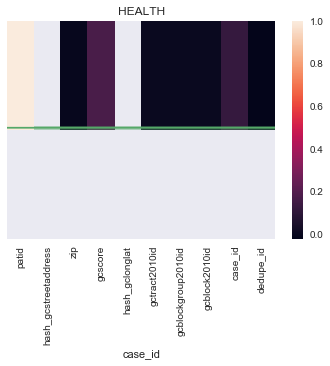

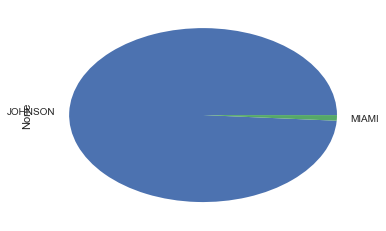

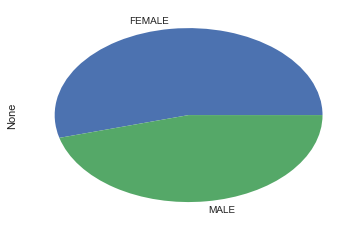

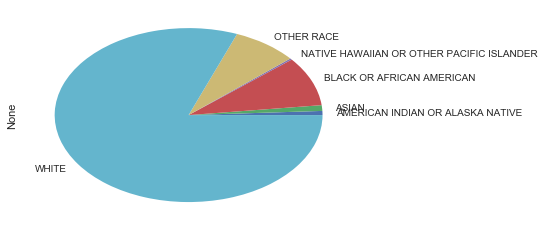

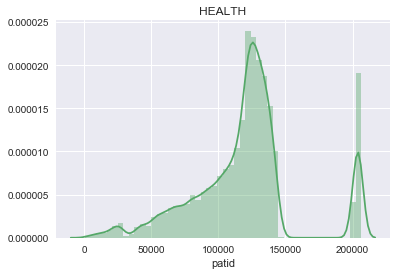

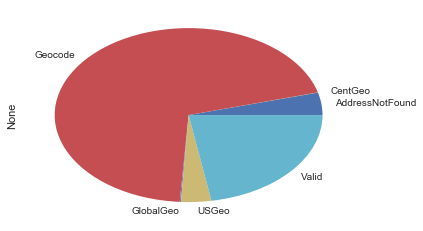

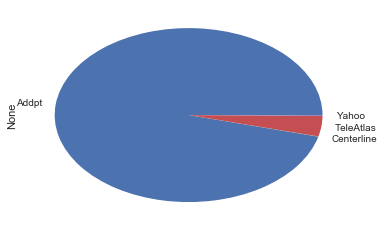

In [16]:
### Code for Visualizations:
draw_correlation_matrix (df, title)

for feature in list_of_columns:
    plotting_curve (df, feature, title)
    making_pie (df, feature)

        

LIST OF COLUMNS: 
Index(['hash_ssn', 'hash_ssn4', 'hash_lname', 'hash_fname', 'patid', 'dob',
       'race', 'sex', 'hash_gcstreetaddress', 'city', 'state', 'zip',
       'gcvalidity', 'gcsrctabl', 'gcscore', 'gccity', 'gccounty', 'gcstate',
       'gczipcode', 'hash_gclonglat', 'gctract2010id', 'gcblockgroup2010id',
       'gcblock2010id', 'admit_date', 'dschrg_date', 'program', 'pri_dx_code',
       'pri_dx_value', 'refferal_source', 'case_id', 'dedupe_id'],
      dtype='object')

NUMBER OF ROWS ARE:  26096
NUMBER OF COLUMNS ARE:  31

SOME BASIC INFORMATION ABOUT THE ATTRIBUTES: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26096 entries, 0 to 26095
Data columns (total 31 columns):
hash_ssn                20917 non-null object
hash_ssn4               20917 non-null object
hash_lname              26096 non-null object
hash_fname              26096 non-null object
patid                   26096 non-null int64
dob                     26089 non-null object
race                    224

hash_lname            0007253fdf9eef30a9296715b0509427152b82c4c3b6e5c7c86b24651c234d78  \
patid                                                      1.286040e+05                  
hash_gcstreetaddress                                                NaN                  
zip                                                        6.606900e+04                  
gcscore                                                    9.000000e+01                  
hash_gclonglat                                                      NaN                  
gctract2010id                                              2.009105e+10                  
gcblockgroup2010id                                         2.009105e+11                  
gcblock2010id                                              2.009105e+14                  
case_id                                                    5.748000e+03                  
dedupe_id                                                  2.633333e+01                  

hash_lnam

gccity                 ABILENE         ALMENA   ARGONIA    ARVADA   ASSARIA  \
patid                 134329.0  102916.000000  138031.0  125984.0  206381.0   
hash_gcstreetaddress       NaN            NaN       NaN       NaN       NaN   
zip                    67410.0   67622.000000   67004.0   80002.0   67416.0   
gcscore                  100.0     100.000000     100.0     100.0     100.0   
hash_gclonglat             NaN            NaN       NaN       NaN       NaN   
gctract2010id              NaN            NaN       NaN       NaN       NaN   
gcblockgroup2010id         NaN            NaN       NaN       NaN       NaN   
gcblock2010id              NaN            NaN       NaN       NaN       NaN   
case_id                21871.0   16076.333333   11301.0   11728.0   23918.0   
dedupe_id             142263.0  281276.000000  329033.0  589094.0  437915.0   

gccity                ATCHISON    AUBURN    AURORA     AVOCA   BALDWIN CITY  \
patid                  88639.0  137945.0   62778.0 

gczipcode                10028     24201     29550     33141     33436  \
patid                 120232.0  132059.0  100660.0  119142.0   73547.0   
hash_gcstreetaddress       NaN       NaN       NaN       NaN       NaN   
zip                    10028.0   24201.0   29550.0   33141.0   33436.0   
gcscore                  100.0     100.0     100.0     100.0     100.0   
hash_gclonglat             NaN       NaN       NaN       NaN       NaN   
gctract2010id              NaN       NaN       NaN       NaN       NaN   
gcblockgroup2010id         NaN       NaN       NaN       NaN       NaN   
gcblock2010id              NaN       NaN       NaN       NaN       NaN   
case_id                 8821.0   16644.0    8163.0    7092.0   13289.0   
dedupe_id             329286.0  527383.0  357370.0  560043.0  611336.0   

gczipcode                33868     37043     37874     38118     44223  \
patid                 110235.0  120858.0  143162.0  130639.0   74808.0   
hash_gcstreetaddress       NaN       

hash_ssn                 5179
hash_ssn4                5179
hash_lname                  0
hash_fname                  0
patid                       0
dob                         7
race                     3692
sex                        65
hash_gcstreetaddress    26096
city                       87
state                      90
zip                       136
gcvalidity                758
gcsrctabl                1814
gcscore                  1814
gccity                   1814
gccounty                 2773
gcstate                  1814
gczipcode                1814
hash_gclonglat          26096
gctract2010id            2993
gcblockgroup2010id       2993
gcblock2010id            2993
admit_date                  0
dschrg_date              4077
program                     0
pri_dx_code                 0
pri_dx_value              467
refferal_source          3168
case_id                     0
dedupe_id                   6
dtype: int64
hash_ssn                17130
hash_ssn4                81

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


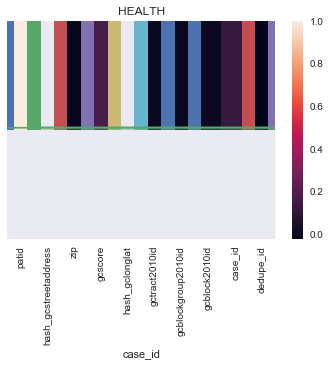

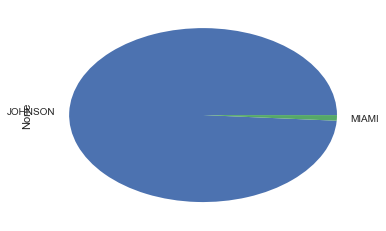

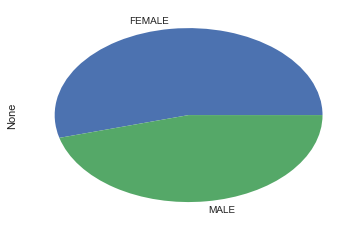

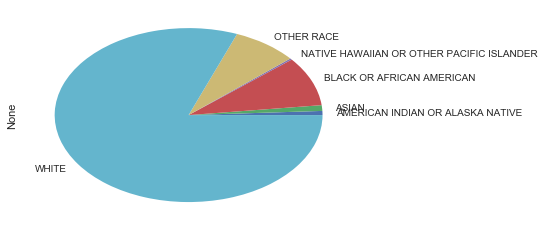

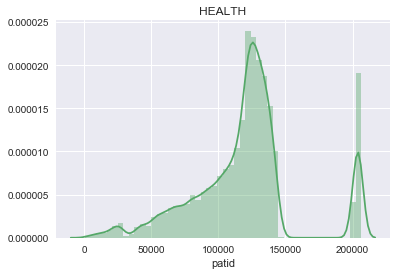

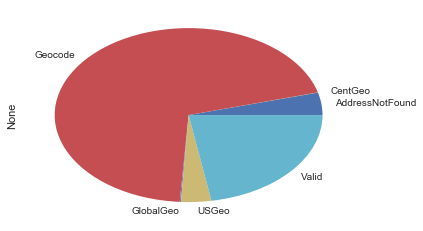

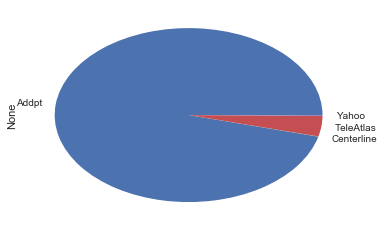

In [19]:

df = pd.read_csv('health.csv')
title = 'HEALTH'

main(df, title)


LIST OF COLUMNS: 
Index(['hash_ssn', 'hash_ssn4_dob', 'mni_no', 'dob', 'original_race', 'race',
       'original_gender', 'sex', 'city', 'state', 'zip', 'country',
       'us_zip_first_five', 'us_zip_last_four', 'tract2010id',
       'blockgroup2010id', 'block2010id', 'joco_resident'],
      dtype='object')

NUMBER OF ROWS ARE:  22110
NUMBER OF COLUMNS ARE:  18

SOME BASIC INFORMATION ABOUT THE ATTRIBUTES: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22110 entries, 0 to 22109
Data columns (total 18 columns):
hash_ssn             20319 non-null object
hash_ssn4_dob        20319 non-null object
mni_no               22110 non-null int64
dob                  22109 non-null object
original_race        22105 non-null object
race                 22104 non-null object
original_gender      22109 non-null object
sex                  22109 non-null object
city                 20029 non-null object
state                20025 non-null object
zip                  20025 non-null object
country 

hash_ssn4_dob     0010765ec33b514a7538194fa5e8565bfe697cc017a10d803183afe660c8b8e7  \
mni_no                                                        633896                 
us_zip_first_five                                              64114                 
us_zip_last_four                                                4606                 
tract2010id                                                      NaN                 
blockgroup2010id                                                 NaN                 
block2010id                                                      NaN                 
joco_resident                                                  False                 

hash_ssn4_dob     00135ee6451ed4f5abe1a1ecbeb57cdcace05ebcc3094ea9332c2445d7f63c11  \
mni_no                                                        628346                 
us_zip_first_five                                              64744                 
us_zip_last_four                                     

tract2010id       2.009105e+10 2.009105e+10 2.009105e+10 2.009105e+10  \
mni_no                  517296       493161       455911       520036   
us_zip_first_five        66205        66205      66202.4        66202   
us_zip_last_four           NaN         2344          NaN       1423.5   
blockgroup2010id   2.00911e+11  2.00911e+11  2.00911e+11  2.00911e+11   
block2010id        2.00911e+14  2.00911e+14  2.00911e+14  2.00911e+14   
joco_resident             True         True         True         True   

tract2010id       2.009105e+10 2.009105e+10 2.009105e+10 2.009105e+10  \
mni_no                  439201       482374       451692       442506   
us_zip_first_five      66202.3        66202      66202.9      66203.9   
us_zip_last_four           NaN       1035.5       3887.5         2146   
blockgroup2010id   2.00911e+11  2.00911e+11  2.00911e+11  2.00911e+11   
block2010id        2.00911e+14  2.00911e+14  2.00911e+14  2.00911e+14   
joco_resident             True         True       

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


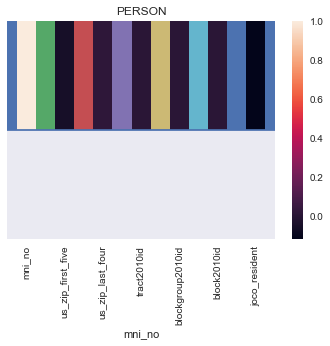

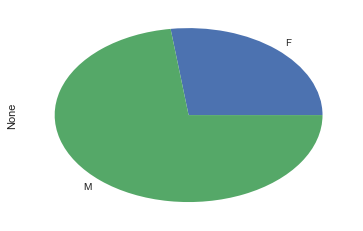

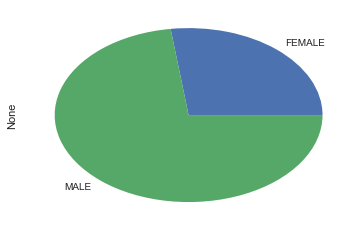

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


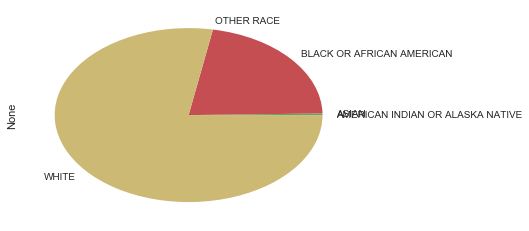

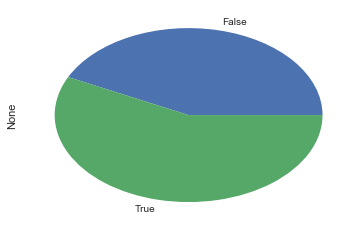

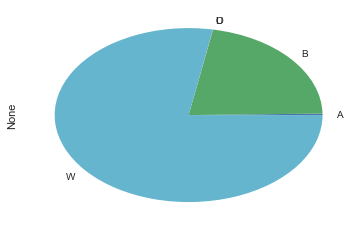

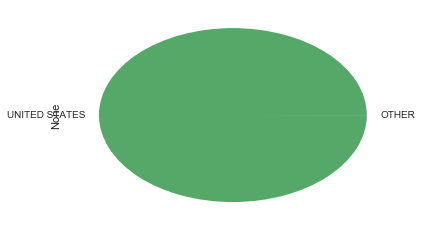

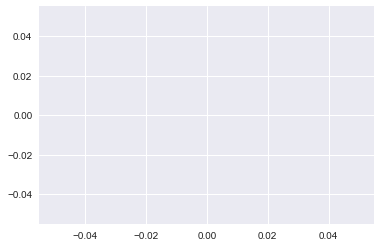

In [20]:

df = pd.read_csv('person.csv')
title = 'PERSON'

main(df, title)


LIST OF COLUMNS: 
Index(['mni_no', 'case_no', 'case_type', 'booking_no', 'arresting_agency',
       'arresting_agency_type', 'booking_date', 'release_date', 'bail_type',
       'bail_amt', 'bailed_out'],
      dtype='object')

NUMBER OF ROWS ARE:  28579
NUMBER OF COLUMNS ARE:  11

SOME BASIC INFORMATION ABOUT THE ATTRIBUTES: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28579 entries, 0 to 28578
Data columns (total 11 columns):
mni_no                   28579 non-null int64
case_no                  28579 non-null object
case_type                28579 non-null object
booking_no               28579 non-null int64
arresting_agency         28577 non-null object
arresting_agency_type    28577 non-null object
booking_date             28579 non-null object
release_date             28208 non-null object
bail_type                22314 non-null object
bail_amt                 22316 non-null float64
bailed_out               28579 non-null bool
dtypes: bool(1), float64(1), int64(2), object(7)


arresting_agency  BLUE VALLEY HIGH CAMPUS P.D.  FAIRWAY P.D.  GARDNER P.D.  \
mni_no                                620547.4  5.240492e+05  4.632055e+05   
booking_no                          12001474.2  1.309955e+07  1.279987e+07   
bail_amt                                   NaN  3.127586e+03  4.455115e+03   
bailed_out                                 0.0  6.744186e-01  7.507837e-01   

arresting_agency  JOHNSON COUNTY PARK PATROL  \
mni_no                          5.185338e+05   
booking_no                      1.256978e+07   
bail_amt                        1.576923e+03   
bailed_out                      8.125000e-01   

arresting_agency  JOHNSON COUNTY SHERIFF'S DEPARTMENT  KANSAS HIGHWAY PATROL  \
mni_no                                   4.784683e+05           5.340881e+05   
booking_no                               1.260459e+07           1.335684e+07   
bail_amt                                 5.777463e+03           3.618117e+03   
bailed_out                               8.05186

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


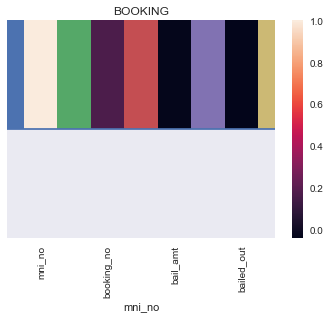

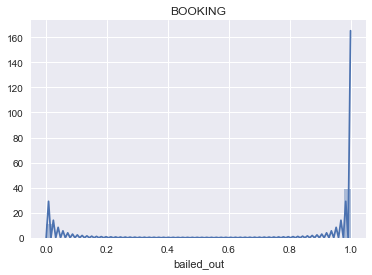

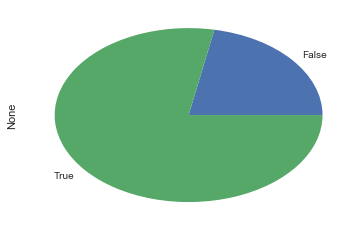

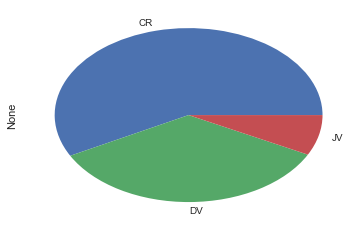

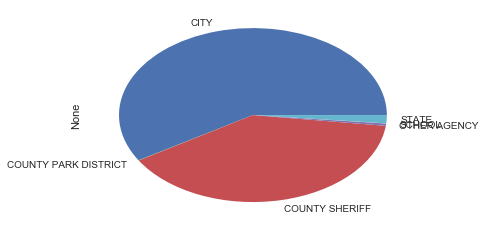

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


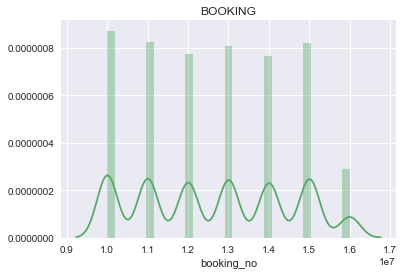

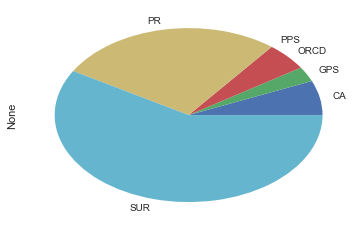

In [21]:

df = pd.read_csv('booking.csv')
title = 'BOOKING'

main(df, title)
